### Obtaining the best perfoming hyperparameter for NN model of the environment
This notebook compares the raw feature selection from the state against the feature construction based on domain knowlegde

In [1]:
# the required imports
import numpy as np
import pandas as pd
# from linear_aproximation import Model
# from environment import network
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# additional import for the Neural Network
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf


Using TensorFlow backend.


In [2]:
# path = '/Users/mawongh/OneDrive/REFERENCE FILE/D/Disertation/brainstorming/'
path = '/home/mawongh/ws/datasets/'
dataset = pd.read_pickle(path + 'full_dataset.pickle')
dataset.tail(3)

,action,reward,s_next,state
299475,121.0,-2.915486,"[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250...","[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250..."
299476,121.0,-3.054551,"[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250...","[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250..."
299477,121.0,-2.653020,"[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250...","[2733, 2733, 2733, 3200, 3200, 3200, 2500, 250..."


In [35]:
# creates an empty dataframe
outputfile = 'NN_results_2.csv'
df = pd.DataFrame(columns = ['algorithm', 'sample_size',
                             'mse', 'data'])
df.to_csv(path + outputfile, index=False)

# # the sample sizes
N = len(dataset)
sample_sizes = np.array([75000, 120000, 150000])
# sample_sizes = np.array([1000, 2000, 3000])
sample_sizes_n = len(sample_sizes)

In [36]:
from keras import optimizers



def train_model6(num_epochs = 20):
    for epoch in np.arange(num_epochs):
        print('model: 6, epoch: {}'.format(epoch))
        for step in np.arange(len(S_train)):
            s = S_train[step].reshape(1,-1)
            r = model6.predict_on_batch(s)
            r[0,int(a_train[step])] = r_train[step]
            model6.train_on_batch(s,r)

In [ ]:
# s = S_train[0].reshape(1,-1)
# r = model6.predict_on_batch(s)
# print(r_train[0])
# print(a_train[0])
# r[0,int(a_train[0])] = r_train[0]
# model6.train_on_batch(s,r)

In [ ]:
# # creates the model, it has to be every time to prevent pre-trained weights
# model6 = Sequential()
# n_cols = 105

# # model 6
# model6.add(Dense(400, activation = 'relu', input_shape=(n_cols,)))
# model6.add(Dense(400, activation = 'relu'))
# model6.add(Dense(400, activation = 'relu'))
# model6.add(Dense(126, activation = 'linear'))
# model6.compile(optimizer=optimizers.Adam(), loss='mean_squared_error')

# np.random.seed(1898)
# N = len(dataset)
# sample_size = 75000
# sample_indexes = np.random.choice(np.arange(N), size = sample_size, replace=False)
# study_dataset = dataset.iloc[sample_indexes]

# S = np.array([x for x in study_dataset.state])
# a_r = study_dataset[['action', 'reward']].values

# S_train, S_test, a_r_train, a_r_test = train_test_split(
#     S, a_r, test_size=0.15, random_state=42)

# a_train = a_r_train[:,0]
# a_test = a_r_test[:,0]

# r_train = a_r_train[:,1]
# r_test = a_r_test[:,1]

# train_model6(num_epochs = 20)

In [ ]:
# y_pred = model6.predict(S_train)
# r_hat = np.array([y_pred[i,int(a_train[i])] for i in np.arange(len(S_train))])
# train_MSE = mean_squared_error(r_train, r_hat)
# print('train MSE: {}'.format(train_MSE))

# # y_pred = model6.predict(S_test)
# # r_hat = np.array([y_pred[i,int(a_test[i])] for i in np.arange(len(S_test))])
# # test_MSE = mean_squared_error(r_test, r_hat)
# # print('test MSE: {}'.format(test_MSE))


In [ ]:
len(y_pred)

In [ ]:
from sklearn.preprocessing import StandardScaler
num_of_experiments = 10
# S = np.array([x for x in study_dataset.state])

for experiments in np.arange(num_of_experiments):
    sample_indexes = [np.random.choice(np.arange(N), size = sz, replace=False)
                     for sz in sample_sizes]
    # np.random.choice(np.arange(10), size =5, replace=False)
    study_dataset = [dataset.iloc[idx] for idx in sample_indexes]
    
    
    S_woScale = [study_dataset[i].state.tolist() for i in np.arange(len(study_dataset))]
    a_r = [df[['action', 'reward']].values for df in study_dataset]
    
    scaler = StandardScaler()
    
    S = [scaler.fit_transform(S_woScale[i]) for i in np.arange(len(S_woScale))]

    
    for ds_idx in np.arange(sample_sizes_n):
        
        #splitting dataset into train/test
        S_train, S_test, a_r_train, a_r_test = train_test_split(
            S[ds_idx], a_r[ds_idx], test_size=0.15, random_state=42)
        
        a_train = a_r_train[:,0]
        a_test = a_r_test[:,0]
        
        r_train = a_r_train[:,1]
        r_test = a_r_test[:,1]
        
#         new_S_train = np.array([S_train[i] for i in np.arange(len(S_train))])
#         S_train = new_S_train
#         new_S_test = np.array([S_test[i] for i in np.arange(len(S_test))])
#         S_test = new_S_test

        
        # creates the model, it has to be every time to prevent pre-trained weights
        model6 = Sequential()
        n_cols = 105

        # model 6
        model6.add(Dense(400, activation = 'relu', input_shape=(n_cols,)))
        model6.add(Dense(400, activation = 'relu'))
        model6.add(Dense(400, activation = 'relu'))
        model6.add(Dense(126, activation = 'linear'))
        model6.compile(optimizer=optimizers.Adam(), loss='mean_squared_error')
        
        print('experiment: {}, sample_size: {}'.format(experiments,len(S[ds_idx])))
        train_model6(num_epochs = 20)
#         print('trained!')
        
        y_pred = model6.predict(S_train)
        r_hat = np.array([y_pred[i,int(a_train[i])] for i in np.arange(len(S_train))])
        train_MSE = mean_squared_error(r_train, r_hat)
        print('train MSE: {}'.format(train_MSE))
        
        y_pred = model6.predict(S_test)
        r_hat = np.array([y_pred[i,int(a_test[i])] for i in np.arange(len(S_test))])
        test_MSE = mean_squared_error(r_test, r_hat)
        print('test MSE: {}'.format(test_MSE))
        
        algorithm = 'NN Model 6'
        record = df.append({'algorithm': algorithm,
                            'sample_size': len(S[ds_idx]),
                            'mse': train_MSE,
                            'data': 'Train'},
                           ignore_index=True)
        record = record.append({'algorithm': algorithm,
                                'sample_size': len(S[ds_idx]),
                                'mse': test_MSE,
                                'data': 'Test'},
                               ignore_index=True)
        # saves the dataframe for further analysis
        record.to_csv(path + outputfile, mode='a', header=False, index=False)
        
    

experiment: 0, sample_size: 75000
model: 6, epoch: 0
model: 6, epoch: 1
model: 6, epoch: 2
model: 6, epoch: 3
train MSE: 1.8267032455259822
test MSE: 1.8672161858997611
experiment: 1, sample_size: 75000
model: 6, epoch: 0
model: 6, epoch: 1
model: 6, epoch: 2
model: 6, epoch: 3
model: 6, epoch: 4
model: 6, epoch: 5
model: 6, epoch: 6
model: 6, epoch: 7
model: 6, epoch: 8
model: 6, epoch: 9
model: 6, epoch: 10
model: 6, epoch: 11


In [39]:
path + outputfile

'/home/mawongh/ws/datasets/NN_results_2.csv'

In [40]:
results = pd.read_csv(path + outputfile)
results.head()

,algorithm,sample_size,mse,data
0,NN Model 6,75000,1.638136,Train
1,NN Model 6,75000,7.283074,Test
2,NN Model 6,120000,1.806626,Train
3,NN Model 6,120000,1.738808,Test
4,NN Model 6,150000,1.826703,Train


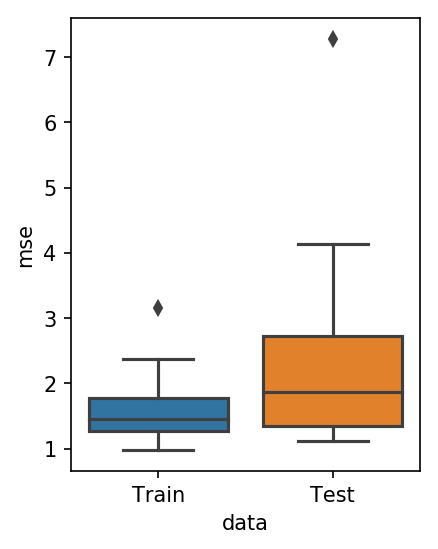

In [44]:
import seaborn as sns
plt.figure(figsize=(3,4), dpi=150)
sns.boxplot(x="data", y="mse", data=results)
plt.show()

## Playground

In [ ]:
np.array([[1,2], [1], [2,3]])

In [ ]:
np.random.choice(20, 30, replace=False)

In [ ]:
np.min([20, 30])

In [ ]:
100 % 100

In [ ]:
model.get_weights()

In [ ]:
s = np.array([10, 20, 40, 50])
s.reshape(1,-1)[0]

In [ ]:
model.get_weights()s.reshape(-1,1)

In [ ]:
model.save('test.h5')




In [ ]:
print("%03d" % (100,))